In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


os.chdir("C:/Users/dvdda/OneDrive/Escritorio/FastApiProjects/pythonProject2")
print("Updated Working Directory:", os.getcwd())

# Define file path
file_path = 'data/raw/mv_newspapers_articles_202410120953.csv' 

# Load the dataset
data = pd.read_csv(file_path)

# Convert 'publicate_date' to datetime format
data['publicate_date'] = pd.to_datetime(data['publicate_date'])


data.head()



Updated Working Directory: C:\Users\dvdda\OneDrive\Escritorio\FastApiProjects\pythonProject2


,id_newspaper_article,publicate_date,amount,tn_id_type_newspaper,type_name,id_country,country_name
0,1,2024-03-01,116,1,El Tiempo,1,Colombia
1,2,2024-03-02,111,1,El Tiempo,1,Colombia
2,3,2024-03-03,106,1,El Tiempo,1,Colombia
3,4,2024-03-04,119,1,El Tiempo,1,Colombia
4,5,2024-03-05,115,1,El Tiempo,1,Colombia


In [8]:
# Step 2: Calculate Mean and Set a Threshold
# Calculate the mean number of articles by day of the week
mean_articles_by_day = data.groupby(data['publicate_date'].dt.day_name())['amount'].mean()
print("Mean Articles by Day of the Week:\n", mean_articles_by_day)

# Set a threshold at 80% of the mean
thresholds = mean_articles_by_day * 0.8
print("Thresholds (80% of Mean):\n", thresholds)



Mean Articles by Day of the Week:
 publicate_date
Friday       79.848485
Monday       80.440104
Saturday     79.721354
Sunday       79.768229
Thursday     80.039062
Tuesday      80.390625
Wednesday    79.859375
Name: amount, dtype: float64
Thresholds (80% of Mean):
 publicate_date
Friday       63.878788
Monday       64.352083
Saturday     63.777083
Sunday       63.814583
Thursday     64.031250
Tuesday      64.312500
Wednesday    63.887500
Name: amount, dtype: float64


In [9]:
# Step 3: Calculate Coefficient of Variation
# Group by newspaper type and calculate the coefficient of variation for each type
cv = data.groupby('type_name')['amount'].apply(lambda x: np.std(x) / np.mean(x))
print("Coefficient of Variation by Newspaper Type:\n", cv)


Coefficient of Variation by Newspaper Type:
 type_name
Clarín                0.089187
El Comercio           0.067523
El Espectador         0.085244
El Tiempo             0.053701
El Universo           0.060637
Estadão               0.076045
Folha de São Paulo    0.087775
La Hora               0.050686
La Nación             0.117845
O Globo               0.056168
Página/12             0.144579
Semana                0.113098
Name: amount, dtype: float64


In [10]:
# Step 4: Frequency Distribution Analysis
# Create a frequency distribution of the 'amount' column
amount_distribution = data['amount'].value_counts().sort_index()
print("Frequency Distribution of Article Amounts:\n", amount_distribution)


Frequency Distribution of Article Amounts:
 amount
30      2
31     15
32      8
33     13
34     11
       ..
126    16
127     9
128     6
129     8
130    11
Name: count, Length: 101, dtype: int64


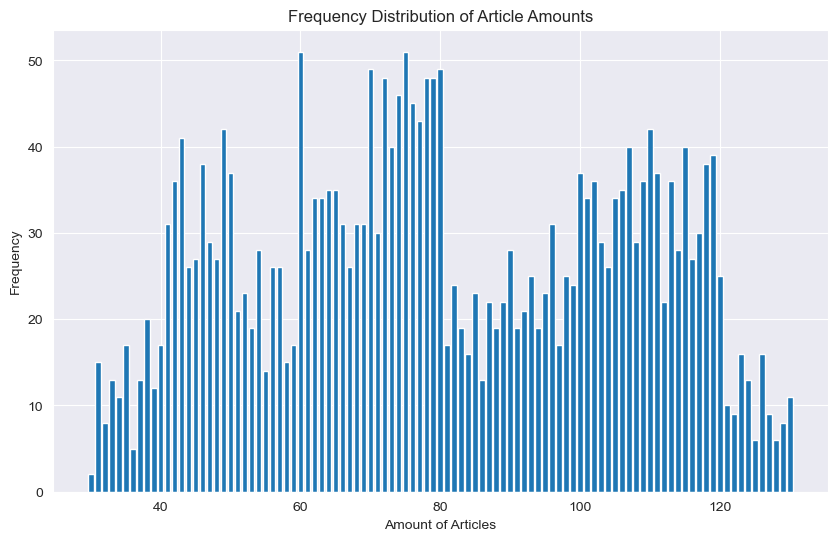

In [11]:
# Plot Frequency Distribution
plt.figure(figsize=(10, 6))
plt.bar(amount_distribution.index, amount_distribution.values)
plt.title('Frequency Distribution of Article Amounts')
plt.xlabel('Amount of Articles')
plt.ylabel('Frequency')
plt.show()
